# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [1]:
# Importing neccessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score
from scikitplot.metrics import plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

In [2]:
df = pd.read_csv('diabetes.csv') #Loading the dataset into a pandas dataframe

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info() #viewing the columns in the dataset and checking for any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**From the output above, it looks like there are no null values which is good**

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.shape

(768, 9)

In [7]:
g_count = (df['Glucose'] == 0).sum() #Counting the 0 values in 'Glucose' column
print(g_count)

5


In [8]:
bp_count = (df['BloodPressure'] == 0).sum()#Counting the 0 values in 'BloodPressure' column
print(bp_count)

35


In [9]:
i_count = (df['Insulin'] == 0).sum()#Counting the 0 values in 'Insulin' column
print(i_count)

374


In [10]:
st_count = (df['SkinThickness'] == 0).sum()#Counting the 0 values in 'SkinThickness' column
print(st_count)

227


In [11]:
bmi_count = (df['BMI'] == 0).sum()#Counting the 0 values in 'BMI' column
print(bmi_count)

11


**As shown above, some of the columns have values of 0. Columns such as 'BloodPressure', 'Glucose', and BMI don't make sense to contain values of 0.**

C:\Users\got1p\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


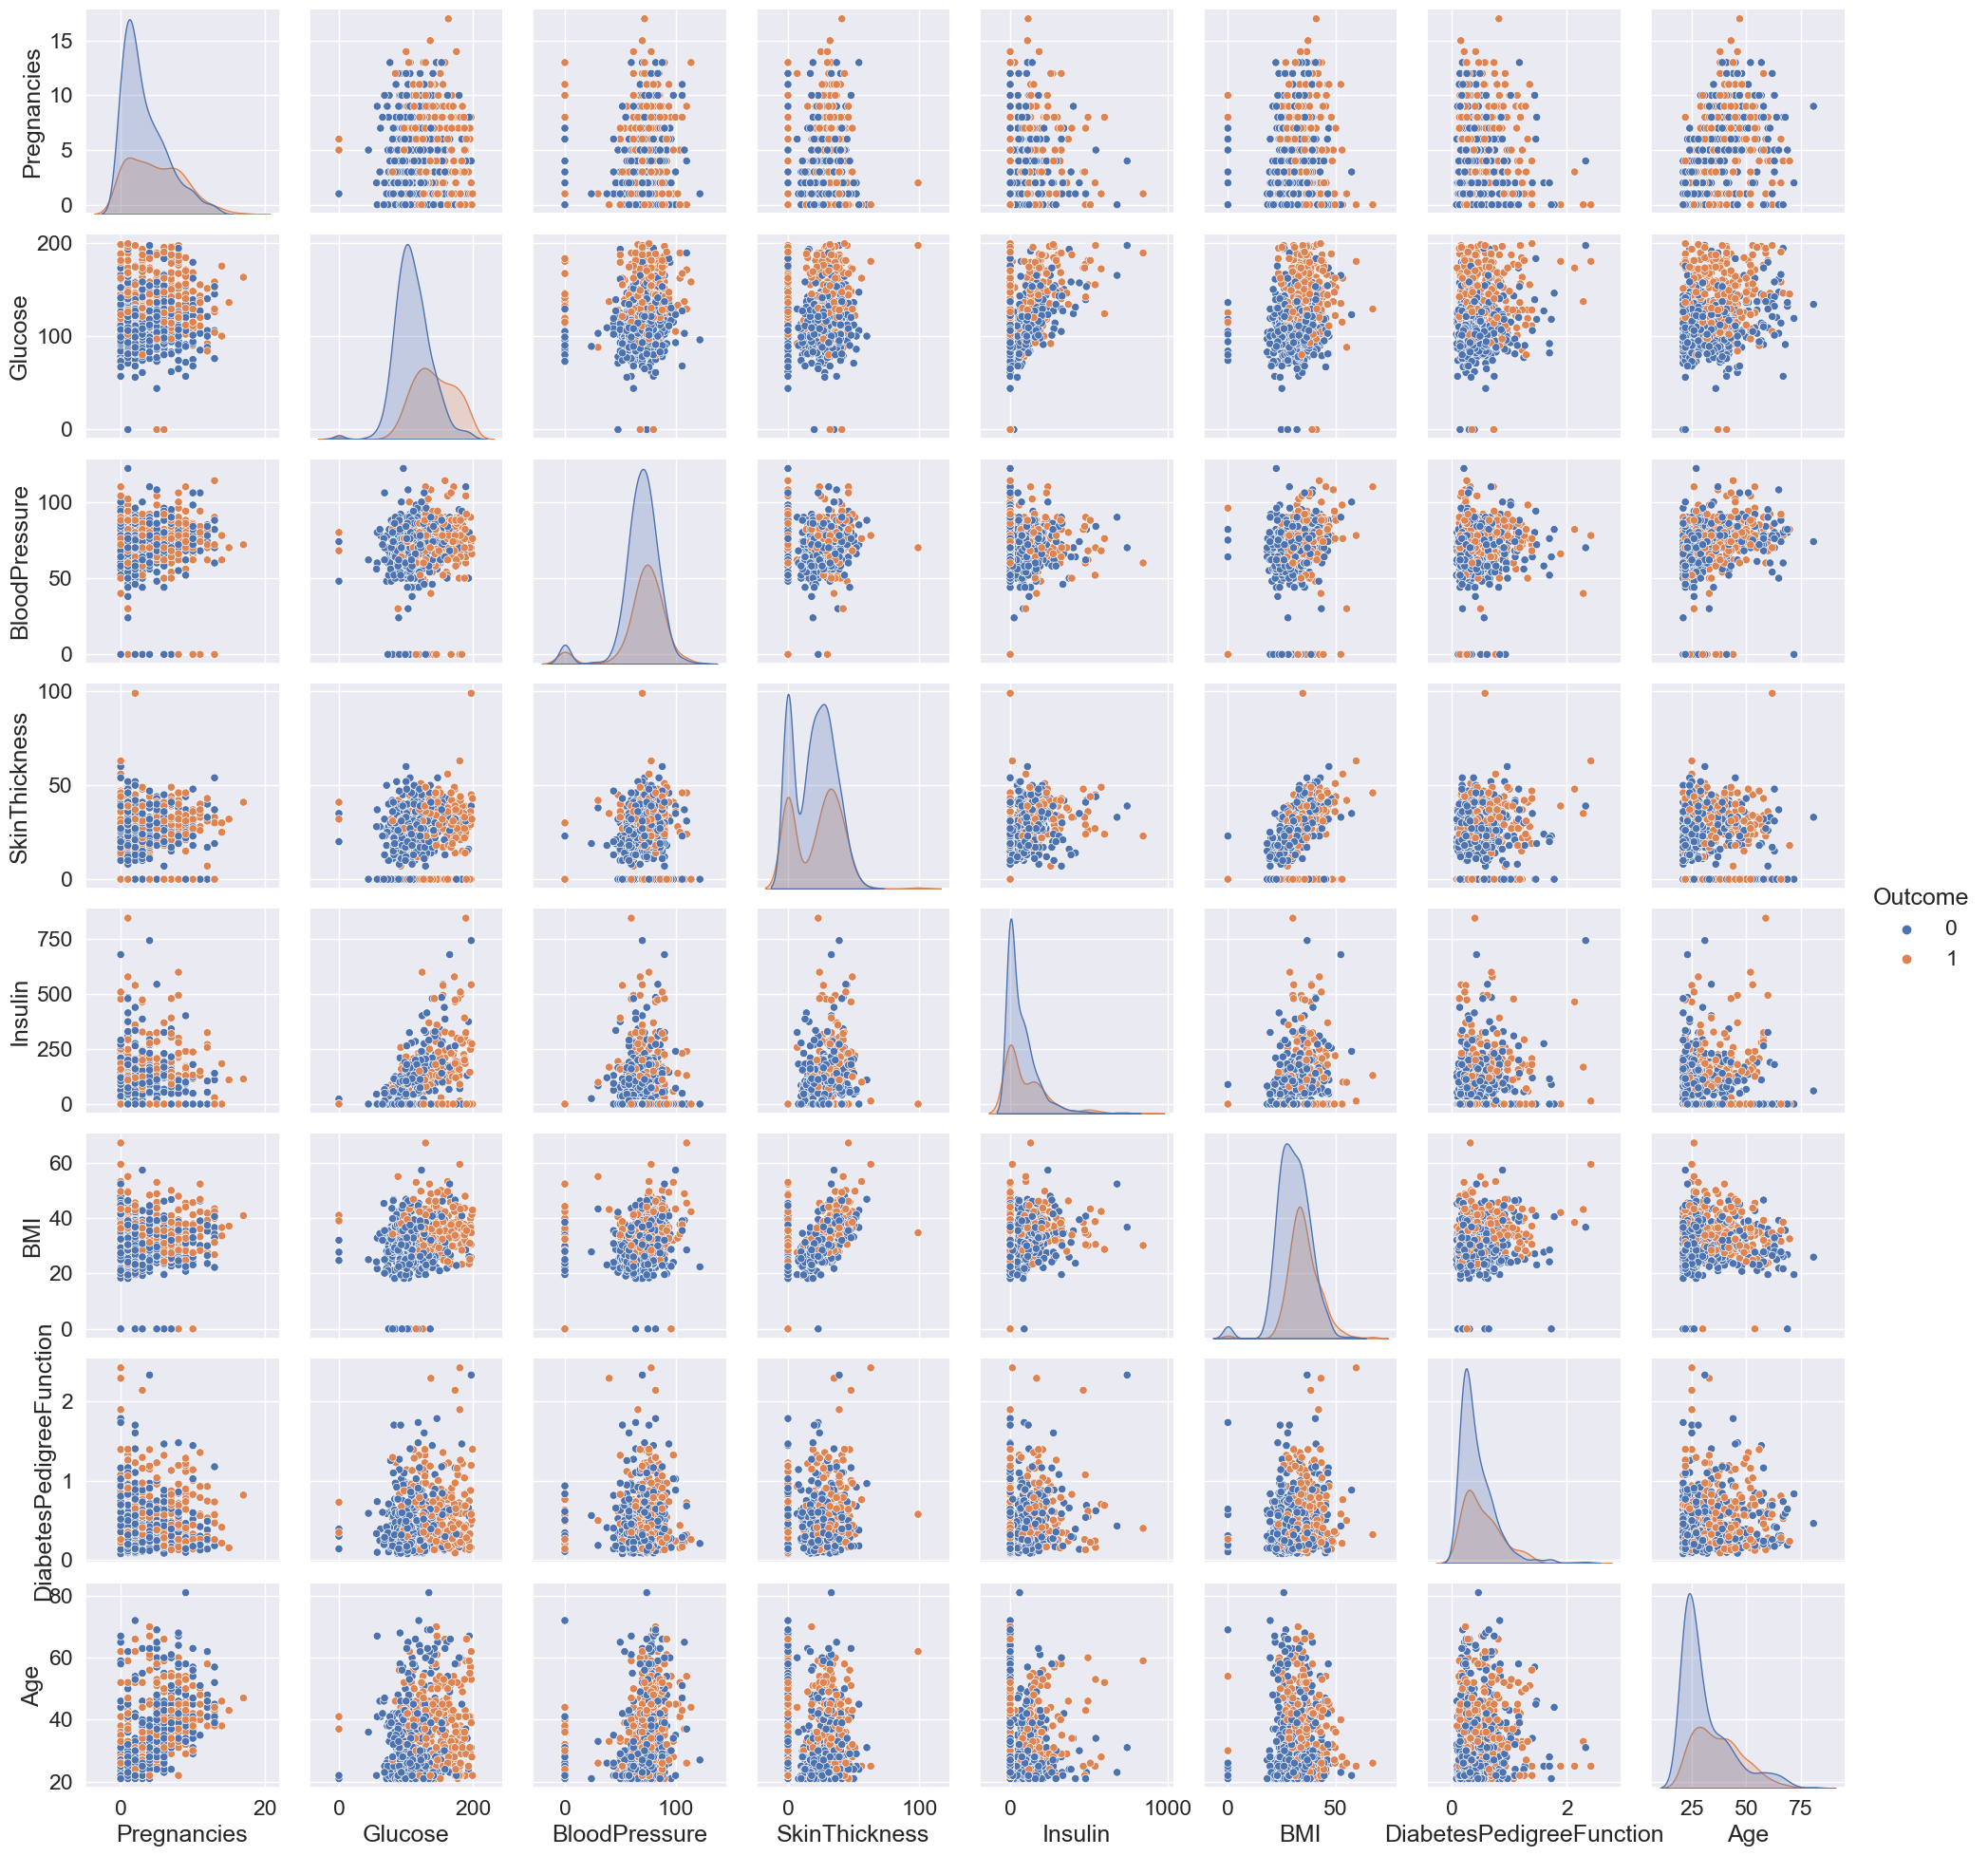

In [12]:
sns.set(font_scale=1.5)
sns.pairplot(df, hue='Outcome')# Using a pairplot to view variables (distributions,correlations, etc) 
plt.show()                     # for people with diabetes and without 

In [13]:
df.drop("Outcome", axis=1).apply(lambda x: x.corr(df.Outcome)) #Looking at correlations between features and the target variable

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
dtype: float64

In [14]:
df.corr() #Looking at variable correlations

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [15]:
df.groupby('Outcome', as_index=False)['Age'].mean() # Getting the average age for people with diabetes and without

,Outcome,Age
0,0,31.190000
1,1,37.067164


In [16]:
df.groupby('Outcome', as_index=False)['Glucose'].mean()

,Outcome,Glucose
0,0,109.980000
1,1,141.257463


In [17]:
df.groupby('Outcome', as_index=False)['BMI'].mean()

,Outcome,BMI
0,0,30.304200
1,1,35.142537


In [18]:
df['Outcome'].value_counts(dropna=False) # Looking at whether the data is well balanced

Outcome
0    500
1    268
Name: count, dtype: int64

**We are going to create some box plots to view outliers in different features**

In [20]:
fig = px.box(df, y='BMI')

fig.show()

In [21]:
fig = px.box(df, y='Insulin')

fig.show()

In [22]:
fig = px.box(df, y='SkinThickness')

fig.show()

In [23]:
fig = px.box(df, y='BloodPressure')

fig.show()

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

**We will remove rows from the dataset which contain values of 0 for glucose, BMI, and blood pressure as there aren't too many so we wont lose too much data**

In [25]:
df.drop(df.loc[df['Glucose']==0].index, inplace=True)
df.drop(df.loc[df['BMI']==0].index, inplace=True)
df.drop(df.loc[df['BloodPressure']==0].index, inplace=True)

df.describe() #Validating that the columns no longer have values of 0.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,21.443370,84.494475,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,15.732756,117.016513,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,24.000000,48.000000,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,130.500000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Several of our predictor variables have outliers so we are going to address them using the Z-score method.**

In [26]:
# find the limits
upper_limit = df['SkinThickness'].mean() + 3*df['SkinThickness'].std()
lower_limit = df['SkinThickness'].mean() - 3*df['SkinThickness'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 68.6416380558638
lower limit: -25.754897724372075


In [27]:
# find the outliers
df.loc[(df['SkinThickness'] > upper_limit) | (df['SkinThickness'] < lower_limit)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197,70,99,0,34.7,0.575,62,1


In [28]:
# remove the outliers
new_df = df.loc[(df['SkinThickness'] < upper_limit) & (df['SkinThickness'] > lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:', len(new_df))

before removing outliers: 724
after removing outliers: 723


**Now we will repeat the process for several other columns**

In [29]:
# find the limit
upper_limit = df['BloodPressure'].mean() + 3*df['BloodPressure'].std()
lower_limit = df['BloodPressure'].mean() - 3*df['BloodPressure'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 109.540163451345
lower limit: 35.2609415210307


In [30]:
# find the outliers
df.loc[(df['BloodPressure'] > upper_limit) | (df['BloodPressure'] < lower_limit)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
18,1,103,30,38,83,43.3,0.183,33,0
43,9,171,110,24,240,45.4,0.721,54,1
106,1,96,122,0,0,22.4,0.207,27,0
125,1,88,30,42,99,55.0,0.496,26,1
177,0,129,110,46,130,67.1,0.319,26,1
549,4,189,110,31,0,28.5,0.680,37,0
597,1,89,24,19,25,27.8,0.559,21,0
691,13,158,114,0,0,42.3,0.257,44,1


In [31]:
# remove the outliers
new_df = df.loc[(df['BloodPressure'] < upper_limit) & (df['BloodPressure'] > lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:', len(new_df))
print('outliers:', len(df) - len(new_df))

before removing outliers: 724
after removing outliers: 716
outliers: 8


In [32]:
df = new_df

In [33]:
df.drop(df.loc[df['Insulin']==846].index, inplace=True) # Dropping the outlier for 'Insulin' with a value of '846'

In [34]:
numeric_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

### Model 1 - Logistic Regression Model

In [35]:
# Split training and test datasets using train_test_split method

random_seed = 888
df_train, df_test = train_test_split(df, test_size=0.2, random_state=random_seed, stratify=df['Outcome'])


print(df_train.shape)
print(df_test.shape)
print()
print(df_train['Outcome'].value_counts(normalize=True))
print()
print(df_test['Outcome'].value_counts(normalize=True))

(572, 9)
(143, 9)

Outcome
0    0.659091
1    0.340909
Name: proportion, dtype: float64

Outcome
0    0.657343
1    0.342657
Name: proportion, dtype: float64


In [36]:
# Scaling the data
scaler = StandardScaler()
scaler.fit(df_train[numeric_cols])

def get_features_and_target_arrays(df, numeric_cols, scaler):
    X_numeric_scaled = scaler.transform(df[numeric_cols])
    X = np.array(X_numeric_scaled)
    y = df['Outcome']
    return X, y

X, y = get_features_and_target_arrays(df_train, numeric_cols, scaler)

In [37]:
X.shape

(572, 8)

In [38]:
y.shape

(572,)

In [39]:
#Fitting our model
clf = LogisticRegression(penalty='none') # logistic regression with no penalty term in the cost function.

clf.fit(X, y)

C:\Users\got1p\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.



LogisticRegression(penalty='none')

In [42]:
#Getting the scaled test dataset

X_test, y_test = get_features_and_target_arrays(df_test, numeric_cols, scaler)

test_prob = clf.predict_proba(X_test)[:, 1]
test_pred = clf.predict(X_test)

#Evaluating model performance
print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, test_pred)))

print('\nClassification Report')
print(classification_report(y_test, test_pred))

Log loss = 0.47089
AUC = 0.84976
Average Precision = 0.70575

Using 0.5 as threshold:
Accuracy = 0.77622
Precision = 0.69767
Recall = 0.61224
F1 score = 0.65217

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.86      0.84        94
           1       0.70      0.61      0.65        49

    accuracy                           0.78       143
   macro avg       0.75      0.74      0.74       143
weighted avg       0.77      0.78      0.77       143



### Decision Tree Model

In [43]:
#split dataset into features and target variable
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Age']
X = df[feature_cols] # Features
y = df.Outcome # Target variable

In [44]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

In [46]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

clf

DecisionTreeClassifier()

In [47]:
test_prob = clf.predict_proba(X_test)[:, 1]
test_pred = clf.predict(X_test)

#Evaluating model performance
print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, test_pred)))

print('\nClassification Report')
print(classification_report(y_test, test_pred))

Log loss = 11.84652
AUC = 0.66750
Average Precision = 0.39424

Using 0.5 as threshold:
Accuracy = 0.67133
Precision = 0.45000
Recall = 0.65854
F1 score = 0.53465

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.68      0.75       102
           1       0.45      0.66      0.53        41

    accuracy                           0.67       143
   macro avg       0.64      0.67      0.64       143
weighted avg       0.72      0.67      0.69       143



# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- Several rows from our dataset were removed due to columns having zeros when they shouldn't. We have seen that Glucose has the highest correlation with whether or not a person has diabetes.
- We have also observed that people with diabetes tend to be older, have a higher glucose level and BMI.
- We found some outliers and removed those neccessary to remove.
- From our models, our Logistic Regression Model gave us a higher accuracy and AUC score, and a lower log loss compared to   the Decision Tree Model we created. This means the Logistic Regression Model has a better performance with our data and returned better results.